# Описание данных.

База данных об авиаперевозках: Таблица airports — информация об аэропортах:
* airport_code — трёхбуквенный код аэропорта 
* airport_name — название аэропорта 
* city — город 
* timezone — временная зона 

Таблица aircrafts — информация об самолётах:
* aircraft_code — код модели самолёта 
* model — модель самолёта 
* range — количество самолётов 

Таблица tickets — информация о билетах:
* ticket_no — уникальный номер билета 
* passenger_id — персональный идентификатор пассажира 
* passenger_name — имя и фамилия пассажира 

Таблица flights — информация о рейсах:
* flight_id — уникальный идентификатор рейса 
* departure_airport — аэропорт вылета 
* departure_time — дата и время вылета 
* arrival_airport — аэропорт прилёта 
* arrival_time — дата и время прилёта 
* aircraft_code – id самолёта Таблица 

ticket_flights — стыковая таблица «рейсы-билеты»
* ticket_no — номер билета 
* flight_id — идентификатор рейса 

Таблица festivals — информация о фестивалях
* festival_id — уникальный номер фестиваля 
* festival_date — дата проведения фестиваля 
* festival_city — город проведения фестиваля 
* festival_name — название фестиваля

Поехали.

*Импортируем библиотеки.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
%matplotlib inline

In [2]:
def for_plot(data, x, y):
    sns.set_palette('pastel')
    plt.figure(figsize=(18,4))
    sns.barplot(x = x, y = y, data = data)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.ylabel(y)
    plt.palette = 'Blues'
    plt.show()
    print(data.sort_values(by = y, ascending = False).head(10).reset_index(drop=True))
    print('-------------------------------------')
    print('В среднем:', data[y].mean())
    print('-------------------------------------')

In [3]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

*Смотрим данные по количеству совершенных полетов по каждой модели самолета:*

In [4]:
(model_flights
             .style.set_caption('Данные по количеству совершенных полетов по каждой модели самолета')
)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


**Типы данных корректны.**

*Пропуски в данных отсутствуют.
В столбце model данные имеют подходящий нам текстовый формат (object), значения в столбце flights_amount целочисленные - то, что нужно.*

**1.1.Bar-plot по количеству совершенных полетов по каждой модели самолета.**

In [6]:
(model_flights.sort_values(by='flights_amount', ascending=False).reset_index(drop=True).style
                                        .bar(subset=['flights_amount'], color='#97F0AA', vmin=0, width=100)
                                        .set_caption('Данные по количеству совершенных полетов по каждой модели самолета')
)

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [7]:
!pip install bokeh

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from bokeh.io import show, output_file, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool

In [9]:
output_notebook()

Loading BokehJS ...

In [10]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [11]:
model_flights_count = model_flights.copy()
model_flights_count = model_flights_count.sort_values(by='flights_amount', ascending=False)


airplanes = model_flights_count['model'].values
values = model_flights_count['flights_amount'].values
title = "Данные по количеству совершенных полетов по каждой модели самолета"

p = figure(x_range=airplanes, 
           plot_height = 350, 
           title=title, 
           tools="box_edit", 
           toolbar_location="right")

source = ColumnDataSource(model_flights_count)
p.vbar(x='model', top='flights_amount', width=0.9, source=source, color='#97F0AA', line_color="black")
p.add_tools(HoverTool(tooltips=[("Модель самолета", "@model"), ("Кол-во вылетов", "@flights_amount")]))
p.xaxis.major_label_orientation = 3.14/3.5
p.xaxis.major_label_text_font_style = "bold"

show(p)

3 модели воздушных судов, которые являются лидерами по частоте использования в России (за период сентябрь'18):

* Cessna 208 Caravan - 4557 перелетов - небольшие самолеты на 9-13 мест (используют а/к в Сибири);
* Bombardier CRJ-200 - 4446 перелетов - самолет на 50 мест, летает Utair;
* Sukhoi SuperJet-100 - 4185 перелетов - вместимость - 98 мест.

**1.2. Топ 10 городов по кол-ву рейсов.**

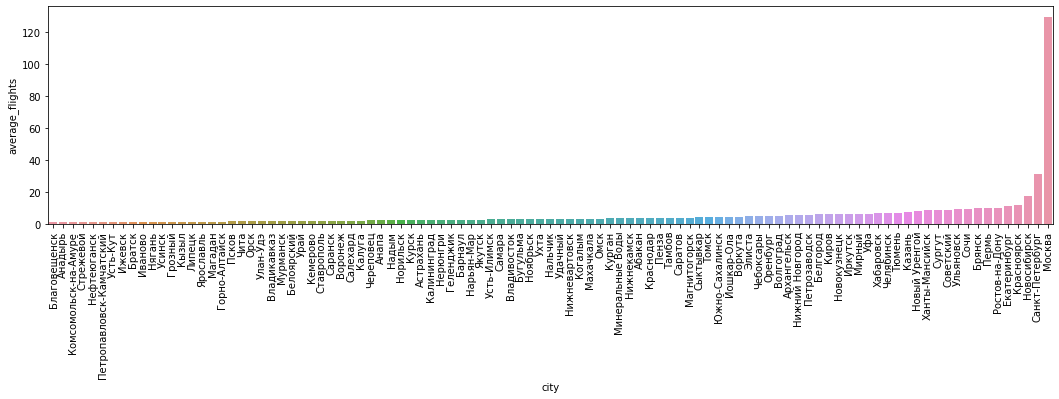

              city  average_flights
0           Москва       129.774194
1  Санкт-Петербург        31.161290
2      Новосибирск        17.322581
3       Красноярск        11.580645
4     Екатеринбург        11.322581
5   Ростов-на-Дону        10.193548
6            Пермь        10.129032
7           Брянск        10.000000
8             Сочи         9.612903
9        Ульяновск         9.580645
-------------------------------------
В среднем: 5.494189113891766
-------------------------------------


In [12]:
for_plot(city_flights.sort_values(by = 'average_flights'), 'city', 'average_flights')

Большое количество городов, которые не принимают и 10 рейсов. Москва в явных лидерах.

**2.1 Подгружаем данные с фестивалями.**

In [13]:
festivals = pd.read_csv('/datasets/query_last.csv')

In [14]:
print('Количество строк - {}'.format(festivals.shape[0]))

Количество строк - 10


In [15]:
festivals.style.set_caption('Данные по фестивалям')

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,nan,nan
3,33,51378,nan,nan
4,34,51492,nan,nan
5,35,51360,nan,nan
6,36,51386,36,Видфест
7,37,51670,nan,nan
8,38,51518,nan,nan
9,39,51623,nan,nan


In [16]:
festivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Данные нормальные, с ними можно работать. Наны не мешают, по ним можно ориентироваться, был фестиваль или нет.

**2.2. Формулировка гипотезы.**

**Гипотеза: количество рейсов во время фестивалей увеличивается.**

Для проверки гипотезы будем использовать t-критерий Стьюдента, т.к. выборки независимы между собой.

Определим пороговое значение alpha = 0.05.

**Н0**: (предположение о том, что между данными у нас нет связи) Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

**Н1**: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время.

Формируем 2 датафрейма: 1 - с неделями, когда были фестивали; 2 - с неделями, когда фестивалей не проводилось:

In [17]:
festival_days = festivals[festivals['festival_week'].notnull()]['ticket_amount']
not_festival_dats = festivals[festivals['festival_week'].isnull()]['ticket_amount']

**2.3. Проверка гипотезы.**

In [18]:
from scipy.stats import ttest_ind
import scipy.stats as st

Установим параметр equal_var = False, т.к. пусть и выборки независимы между собой, но мы не уверены, что они имеют одинаковую дисперсию:

In [19]:
stat, p = ttest_ind(festival_days, not_festival_dats, equal_var=False)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')
print('\nИтог - {}'.format('отклоняем нулевую гипотезу' if p <= 0.05 else 'оставляем в силе нулевую гипотезу'))

t = -1.1248513751916296
p-value = 3.7743249317e-01

Пороговое значение alpha = 0.05

Итог - оставляем в силе нулевую гипотезу


Верно: **Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.**

**2.4. Расчет доверительных интервалов по выборкам.**

In [20]:
import statsmodels.stats.api as sms

In [22]:
print('Доверительный интервал по данным из выборки, когда фестиваль проходил - {}'.
      format(sms.DescrStatsW(festival_days).tconfint_mean()))
print('Доверительный интервал по данным из выборки, когда фестиваль не проходил - {}'.
      format(sms.DescrStatsW(not_festival_dats).tconfint_mean()))

Доверительный интервал по данным из выборки, когда фестиваль проходил - (37693.65924921319, 59631.67408412014)
Доверительный интервал по данным из выборки, когда фестиваль не проходил - (51409.764223837876, 51651.950061876414)


К чему мы пришли:

* **пришли к выводу, что в дни фестивалей средний спрос на авиабилеты не отличается от спрос на авиабилеты в те дни, когда фестивали не проводятся;**
* **изучили данные по количеству перелетов за сентябрь 2018г. по каждой модели самолета, выяснили, что самыми используемыми моделями самолета (в сентябре 2018г.) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;**
* **всего в сентябре 2018 в Москве было проведено 3 крупных Фестиваля: Park Live, Пикник Афиши, Видфест. Их проведение, в среднем, не повлияло на количество приобретенных билетов с пунктом назначения - Москва;**
* **в среднем за сентябрь 2018 года каждый город, отраженный в данных, в среднем принял 5 рейсов.**